# ifm_contrib: Time Series - Pandas Extension

PANDAS is a Python library with powerfull features for time series processing.
The `doc.c.hist.df` object provides access to the histories of a FEFLOW model to allow fast processing.

*contact: [Alex Renz](https://github.com/red5alex), are@dhigroup.com* 

In [1]:
import sys
sys.path.append("C:/Program Files/DHI/2019/FEFLOW 7.2/python")
import ifm_contrib as ifm 
ifm.forceLicense("Viewer")
doc = ifm.loadDocument("./example_data/example_2D.dac")

remember, the following histories may be available depending on problem time:

In [2]:
from ifm import Enum
" ".join([i.replace("HIST_","") for i in dir(Enum) if i.startswith("HIST_")])

'ANA AVER_H AVER_M BHE BHE_IO FFLUX FFLUX_I HEAD HFLUX HFLUX_I IFM ITERA LOCA_H LOCA_M MFLUX MFLUX_I MULTW_FLUX RESIDUAL TIMES VARIO'

To get a history as a dataframe, you can call it as an attribute of the `doc.c.hist.df` object:

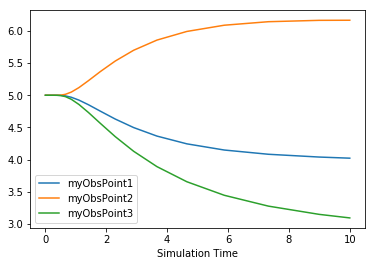

In [3]:
%matplotlib inline
doc.c.hist.df.HEAD.plot()

Alternatively, you can call the conversion function `getDataframe()` directly. This is less code-efficient, but let's you use addition parameters how the DataFrame is created, e.g. if a time or calendar axis shall be used.

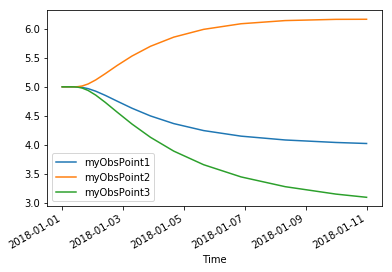

In [4]:
# call using friendly name
from datetime import datetime
doc.c.hist.df.getDataframe("HEAD", reference_time=datetime(2018,1,1)).plot()

Note that calling `getDataFrame` will also cause the attribute to change.

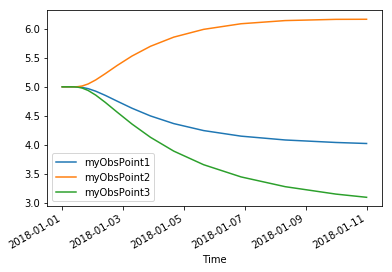

In [5]:
doc.c.hist.df.HEAD.plot()

This function allows fast access to all history chart windows of FEFLOW. 

Text(0,0.5,'time step length [d]')

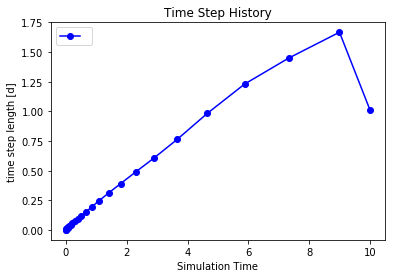

In [6]:
import matplotlib.pyplot as plt
ax=plt.gca()
doc.c.hist.df.TIMES.plot(style="bo-", title="Time Step History", ax=ax)
ax.set_ylabel("time step length [d]")